In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import collections
import sqlite3
from pathlib import Path



In [2]:
application = pd.read_csv('application_data.csv')

previous = pd.read_csv('previous_application.csv')


In [3]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

print(application['NAME_CONTRACT_TYPE'].value_counts())


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


In [7]:
application.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [8]:
previous.info

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

In [9]:
previous['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [10]:
previous['SK_ID_PREV'].duplicated().value_counts()

False    1670214
Name: SK_ID_PREV, dtype: int64

In [11]:
previous['SK_ID_CURR'].duplicated().value_counts()

True     1331357
False     338857
Name: SK_ID_CURR, dtype: int64

In [12]:
application['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [13]:
previous['NAME_CONTRACT_TYPE'].unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [14]:
previous['WEEKDAY_APPR_PROCESS_START'].unique()

array(['SATURDAY', 'THURSDAY', 'TUESDAY', 'MONDAY', 'FRIDAY', 'SUNDAY',
       'WEDNESDAY'], dtype=object)

In [15]:
previous['PRODUCT_COMBINATION'].unique()


array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [16]:
previous['PRODUCT_COMBINATION'].isna().value_counts()

False    1669868
True         346
Name: PRODUCT_COMBINATION, dtype: int64

In [17]:
previous.groupby(by='WEEKDAY_APPR_PROCESS_START')['NAME_CONTRACT_STATUS'].describe()

,count,unique,top,freq
WEEKDAY_APPR_PROCESS_START,,,,
FRIDAY,252048,4,Approved,153116
MONDAY,253557,4,Approved,149589
SATURDAY,240631,4,Approved,162993
SUNDAY,164751,4,Approved,118319
THURSDAY,249099,4,Approved,149384
TUESDAY,255118,4,Approved,151273
WEDNESDAY,255010,4,Approved,152107


In [18]:
application['Older'] = application['SK_ID_CURR'].isin(previous['SK_ID_CURR'])
application.sort_values('SK_ID_CURR').head(25)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Older
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,True
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,True
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True


In [19]:
previous.sort_values('SK_ID_CURR').head(25)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.50,23787.0,2520.00,24835.50,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
935548,1564014,100004,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
1259112,1857999,100005,Cash loans,NaN,0.00,0.0,NaN,NaN,FRIDAY,10,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1378978,2495675,100005,Consumer loans,4813.200,44617.50,40153.5,4464.00,44617.50,THURSDAY,11,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
900957,1489396,100006,Revolving loans,13500.000,270000.00,270000.0,NaN,270000.00,THURSDAY,15,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
1607443,1697039,100006,Cash loans,32696.100,688500.00,906615.0,NaN,688500.00,THURSDAY,15,...,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
previous.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [21]:
previous.select_dtypes('int64')

,SK_ID_PREV,SK_ID_CURR,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
0,2030495,271877,15,1,-73,35
1,2802425,108129,11,1,-164,-1
2,2523466,122040,11,1,-301,-1
3,2819243,176158,7,1,-512,-1
4,1784265,202054,9,1,-781,-1
...,...,...,...,...,...,...
1670209,2300464,352015,12,1,-544,43
1670210,2357031,334635,15,1,-1694,43
1670211,2659632,249544,12,1,-1488,1370
1670212,2785582,400317,9,1,-1185,-1


In [22]:
previous.select_dtypes('float64')

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,0.0,17145.0,0.000000,0.182832,0.867336,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,14704.290,267295.5,311400.0,0.0,267295.5,0.000000,NaN,NaN,30.0,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,6622.020,87750.0,64291.5,29250.0,87750.0,0.340554,NaN,NaN,12.0,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,11520.855,105237.0,102523.5,10525.5,105237.0,0.101401,NaN,NaN,10.0,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,18821.520,180000.0,191880.0,NaN,180000.0,NaN,NaN,NaN,12.0,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [23]:
previous.select_dtypes('object')

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,Consumer loans,WEDNESDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,Furniture,low_normal,POS industry with interest
1670210,Consumer loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
1670211,Consumer loans,MONDAY,Y,XAP,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_normal,POS household with interest
1670212,Cash loans,WEDNESDAY,Y,XNA,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low


In [24]:
float_cols = previous.select_dtypes('float64').columns
float_cols = [col for col in float_cols if 'NFLAG_INSURED_ON_APPROVAL' not in col]
float_cols


['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [25]:
previous[['SK_ID_CURR']+list(float_cols)].head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,271877,1730.430,17145.0,17145.0,0.0,17145.0,0.0,0.182832,0.867336,12.0,365243.0,-42.0,300.0,-42.0,-37.0
1,108129,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,36.0,365243.0,-134.0,916.0,365243.0,365243.0
2,122040,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,12.0,365243.0,-271.0,59.0,365243.0,365243.0
3,176158,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0
4,202054,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN


In [26]:
dummy_cols = previous.select_dtypes('object').columns
dummy_cols = [col for col in dummy_cols]

In [27]:
dummy_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [28]:
previous[['SK_ID_CURR']+list(dummy_cols)].head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,271877,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,108129,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,122040,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,176158,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,202054,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


In [29]:
prev_dummies = pd.get_dummies(previous[['SK_ID_CURR']+list(dummy_cols)]).groupby('SK_ID_CURR').sum()

In [30]:
prev_dummies.head(20)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100002,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100003,1,2,0,0,1,0,1,1,0,0,...,1,0,1,0,1,0,0,0,0,0
100004,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100005,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
100006,5,2,2,0,0,0,1,1,6,1,...,2,0,1,0,1,0,0,0,0,0
100007,4,2,0,0,1,1,1,2,1,0,...,0,3,1,0,0,0,1,0,0,0
100008,2,3,0,0,1,3,0,0,1,0,...,0,1,2,0,0,0,1,0,0,0
100009,0,7,0,0,0,1,2,2,0,0,...,0,0,5,1,0,0,1,0,0,0


In [31]:
agg_functions = ['sum', 'min', 'max', 'mean', 'count']
agg_functions

['sum', 'min', 'max', 'mean', 'count']

In [32]:
agg_Dict = {}

[agg_Dict.update({col : agg_functions}) for col in float_cols]

agg_Dict

{'AMT_ANNUITY': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_APPLICATION': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_CREDIT': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_DOWN_PAYMENT': ['sum', 'min', 'max', 'mean', 'count'],
 'AMT_GOODS_PRICE': ['sum', 'min', 'max', 'mean', 'count'],
 'RATE_DOWN_PAYMENT': ['sum', 'min', 'max', 'mean', 'count'],
 'RATE_INTEREST_PRIMARY': ['sum', 'min', 'max', 'mean', 'count'],
 'RATE_INTEREST_PRIVILEGED': ['sum', 'min', 'max', 'mean', 'count'],
 'CNT_PAYMENT': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_FIRST_DRAWING': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_FIRST_DUE': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_LAST_DUE_1ST_VERSION': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_LAST_DUE': ['sum', 'min', 'max', 'mean', 'count'],
 'DAYS_TERMINATION': ['sum', 'min', 'max', 'mean', 'count']}

In [33]:
agg_data= previous[['SK_ID_CURR'] + list(float_cols)].groupby('SK_ID_CURR').agg(agg_Dict)
agg_data.head()

AMT_ANNUITY                                       AMT_APPLICATION  \
                   sum       min        max       mean count             sum   
SK_ID_CURR                                                                     
100001        3951.000  3951.000   3951.000   3951.000     1         24835.5   
100002        9251.775  9251.775   9251.775   9251.775     1        179055.0   
100003      169661.970  6737.310  98356.995  56553.990     3       1306309.5   
100004        5357.250  5357.250   5357.250   5357.250     1         24282.0   
100005        4813.200  4813.200   4813.200   4813.200     1         44617.5   

                                                 ... DAYS_LAST_DUE          \
                 min       max       mean count  ...           sum     min   
SK_ID_CURR                                       ...                         
100001       24835.5   24835.5   24835.50     1  ...       -1619.0 -1619.0   
100002      179055.0  179055.0  179055.00     1  ...         -25.0   -25.0   
100003       68809.5  900000.0  435436.50     3  ...       -3163.0 -1980.0   
100004       24282.0   24282.0   24282.00     1  ...        -724.0  -724.0   
100005           0.0   44617.5   22308.75     2  ...        -466.0  -466.0   

                                      DAYS_TERMINATION                  \
               max         mean count              sum     min     max   
SK_ID_CURR                                                               
100001     -1619.0 -1619.000000     1          -1612.0 -1612.0 -1612.0   
100002       -25.0   -25.000000     1            -17.0   -17.0   -17.0   
100003      -536.0 -1054.333333     3          -3142.0 -1976.0  -527.0   
100004      -724.0  -724.000000     1           -714.0  -714.0  -714.0   
100005      -466.0  -466.000000     1           -460.0  -460.0  -460.0   

                               
                   mean count  
SK_ID_CURR                     
100001     -1612.000000     1  
100002       -17.000000     1  
100003     -1047.333333     3  
100004      -714.000000     1  
100005      -460.000000     1  

[5 rows x 70 columns]

In [34]:
agg_data.columns = ['_'.join(col) for col in agg_data.columns]
agg_data.head()

,AMT_ANNUITY_sum,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_count,AMT_APPLICATION_sum,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_APPLICATION_count,...,DAYS_LAST_DUE_sum,DAYS_LAST_DUE_min,DAYS_LAST_DUE_max,DAYS_LAST_DUE_mean,DAYS_LAST_DUE_count,DAYS_TERMINATION_sum,DAYS_TERMINATION_min,DAYS_TERMINATION_max,DAYS_TERMINATION_mean,DAYS_TERMINATION_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,3951.000,1,24835.5,24835.5,24835.5,24835.50,1,...,-1619.0,-1619.0,-1619.0,-1619.000000,1,-1612.0,-1612.0,-1612.0,-1612.000000,1
100002,9251.775,9251.775,9251.775,9251.775,1,179055.0,179055.0,179055.0,179055.00,1,...,-25.0,-25.0,-25.0,-25.000000,1,-17.0,-17.0,-17.0,-17.000000,1
100003,169661.970,6737.310,98356.995,56553.990,3,1306309.5,68809.5,900000.0,435436.50,3,...,-3163.0,-1980.0,-536.0,-1054.333333,3,-3142.0,-1976.0,-527.0,-1047.333333,3
100004,5357.250,5357.250,5357.250,5357.250,1,24282.0,24282.0,24282.0,24282.00,1,...,-724.0,-724.0,-724.0,-724.000000,1,-714.0,-714.0,-714.0,-714.000000,1
100005,4813.200,4813.200,4813.200,4813.200,1,44617.5,0.0,44617.5,22308.75,2,...,-466.0,-466.0,-466.0,-466.000000,1,-460.0,-460.0,-460.0,-460.000000,1


In [35]:
agg_data.shape

(338857, 70)

In [36]:
combo_data = pd.concat([agg_data, prev_dummies], axis=1)
combo_data

,AMT_ANNUITY_sum,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_count,AMT_APPLICATION_sum,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_APPLICATION_count,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,3951.000000,1,24835.5,24835.5,24835.5,24835.500,1,...,0,0,0,0,0,0,1,0,0,0
100002,9251.775,9251.775,9251.775,9251.775000,1,179055.0,179055.0,179055.0,179055.000,1,...,0,0,0,0,0,0,0,0,1,0
100003,169661.970,6737.310,98356.995,56553.990000,3,1306309.5,68809.5,900000.0,435436.500,3,...,1,0,1,0,1,0,0,0,0,0
100004,5357.250,5357.250,5357.250,5357.250000,1,24282.0,24282.0,24282.0,24282.000,1,...,0,0,0,0,0,0,0,1,0,0
100005,4813.200,4813.200,4813.200,4813.200000,1,44617.5,0.0,44617.5,22308.750,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,6605.910,6605.910,6605.910,6605.910000,1,40455.0,40455.0,40455.0,40455.000,1,...,0,0,0,0,0,0,1,0,0,0
456252,10074.465,10074.465,10074.465,10074.465000,1,57595.5,57595.5,57595.5,57595.500,1,...,0,0,0,1,0,0,0,0,0,0
456253,9540.810,3973.095,5567.715,4770.405000,2,48325.5,19413.0,28912.5,24162.750,2,...,0,0,0,0,0,0,2,0,0,0


In [37]:
combo_data['Target'] = combo_data.index.map(application.set_index('SK_ID_CURR')['TARGET'])
combo_data

,AMT_ANNUITY_sum,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_count,AMT_APPLICATION_sum,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_APPLICATION_count,...,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,Target
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,3951.000000,1,24835.5,24835.5,24835.5,24835.500,1,...,0,0,0,0,0,1,0,0,0,NaN
100002,9251.775,9251.775,9251.775,9251.775000,1,179055.0,179055.0,179055.0,179055.000,1,...,0,0,0,0,0,0,0,1,0,1.0
100003,169661.970,6737.310,98356.995,56553.990000,3,1306309.5,68809.5,900000.0,435436.500,3,...,0,1,0,1,0,0,0,0,0,0.0
100004,5357.250,5357.250,5357.250,5357.250000,1,24282.0,24282.0,24282.0,24282.000,1,...,0,0,0,0,0,0,1,0,0,0.0
100005,4813.200,4813.200,4813.200,4813.200000,1,44617.5,0.0,44617.5,22308.750,2,...,0,0,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,6605.910,6605.910,6605.910,6605.910000,1,40455.0,40455.0,40455.0,40455.000,1,...,0,0,0,0,0,1,0,0,0,0.0
456252,10074.465,10074.465,10074.465,10074.465000,1,57595.5,57595.5,57595.5,57595.500,1,...,0,0,1,0,0,0,0,0,0,0.0
456253,9540.810,3973.095,5567.715,4770.405000,2,48325.5,19413.0,28912.5,24162.750,2,...,0,0,0,0,0,2,0,0,0,0.0


In [38]:
previous.loc[previous['SK_ID_CURR']==100001]   

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.0,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0


In [39]:
application.loc[application['SK_ID_CURR']==100001]   

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Older


In [40]:
combo_data = combo_data[combo_data['Target'].notna()]
combo_data

,AMT_ANNUITY_sum,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_count,AMT_APPLICATION_sum,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_APPLICATION_count,...,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,Target
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,9251.775,9251.775,9251.775,9251.775000,1,179055.00,179055.0,179055.0,179055.000,1,...,0,0,0,0,0,0,0,1,0,1.0
100003,169661.970,6737.310,98356.995,56553.990000,3,1306309.50,68809.5,900000.0,435436.500,3,...,0,1,0,1,0,0,0,0,0,0.0
100004,5357.250,5357.250,5357.250,5357.250000,1,24282.00,24282.0,24282.0,24282.000,1,...,0,0,0,0,0,0,1,0,0,0.0
100006,141907.050,2482.920,39954.510,23651.175000,6,2449829.34,0.0,688500.0,272203.260,9,...,0,1,0,1,0,0,0,0,0,0.0
100007,73672.830,1834.290,22678.785,12278.805000,6,903181.50,17176.5,247500.0,150530.250,6,...,3,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,6605.910,6605.910,6605.910,6605.910000,1,40455.00,40455.0,40455.0,40455.000,1,...,0,0,0,0,0,1,0,0,0,0.0
456252,10074.465,10074.465,10074.465,10074.465000,1,57595.50,57595.5,57595.5,57595.500,1,...,0,0,1,0,0,0,0,0,0,0.0
456253,9540.810,3973.095,5567.715,4770.405000,2,48325.50,19413.0,28912.5,24162.750,2,...,0,0,0,0,0,2,0,0,0,0.0


In [41]:
combo_data['CHANNEL_TYPE_Contact center']

SK_ID_CURR
100002    0
100003    0
100004    0
100006    0
100007    0
         ..
456251    0
456252    0
456253    0
456254    0
456255    0
Name: CHANNEL_TYPE_Contact center, Length: 291057, dtype: uint8

In [42]:
from plotnine import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

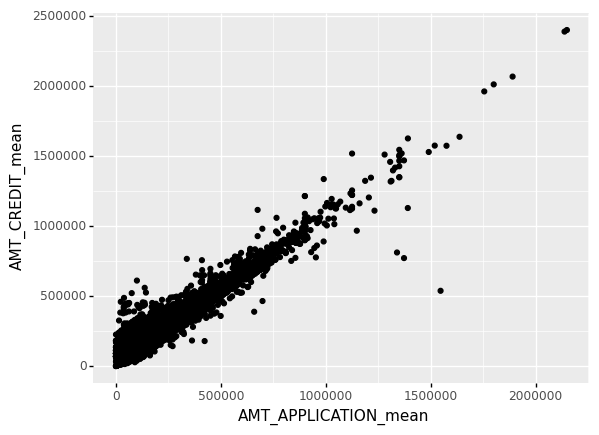

<ggplot: (152397832482)>

In [43]:
combo_data1= combo_data[combo_data['Target'] == 1]
ggplot(combo_data1, aes(x= 'AMT_APPLICATION_mean', y='AMT_CREDIT_mean')) + geom_point()
# Explore Combo Data DF filtered for Target as 1
# Does the Credit and Application Amount Differ

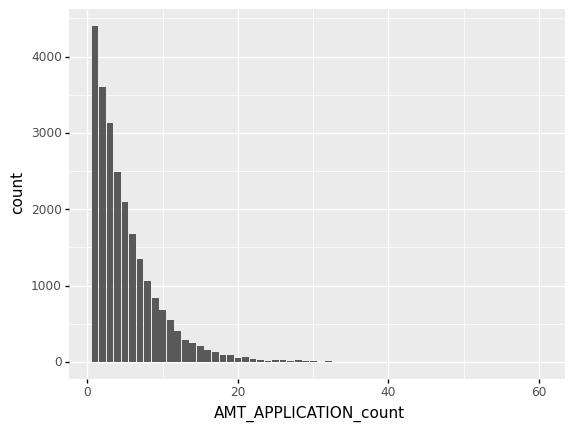

<ggplot: (152439248574)>

In [44]:
ggplot(combo_data1, aes(x= 'AMT_APPLICATION_count')) + geom_bar()
# Number of Applications affect default

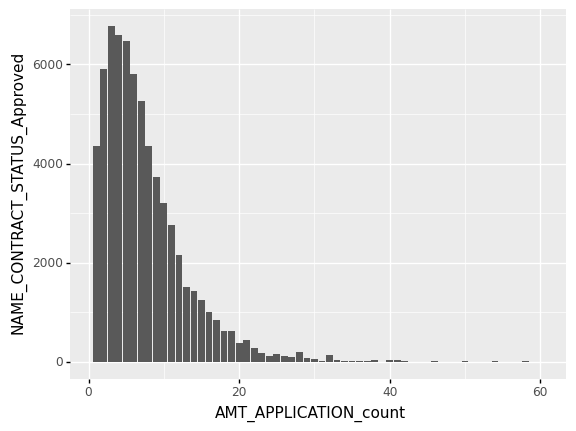

<ggplot: (152439292555)>

In [45]:
# Does the default, number of Applications and previous contract status matter
ggplot(combo_data1, aes(x= 'AMT_APPLICATION_count', y = 'NAME_CONTRACT_STATUS_Approved')) + geom_col()

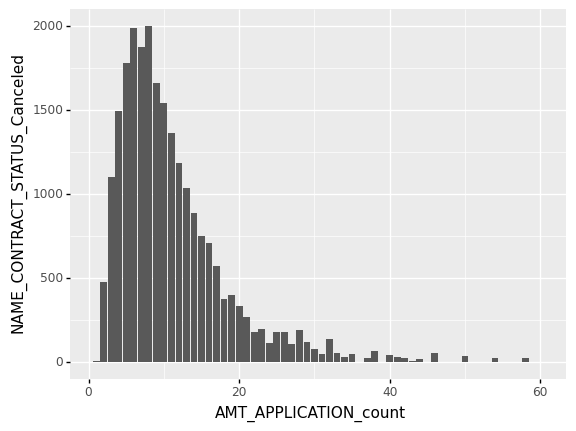

<ggplot: (152439290489)>

In [46]:
ggplot(combo_data1, aes(x= 'AMT_APPLICATION_count', y = 'NAME_CONTRACT_STATUS_Canceled')) + geom_col()

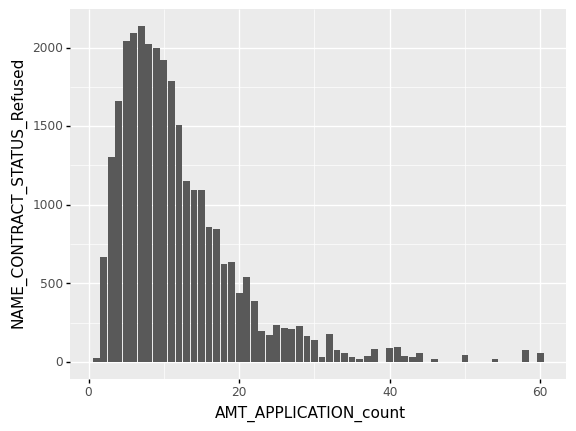

<ggplot: (152565381967)>

In [47]:
ggplot(combo_data1, aes(x= 'AMT_APPLICATION_count', y = 'NAME_CONTRACT_STATUS_Refused')) + geom_col()

#There seems to be a higher default if more were refused before

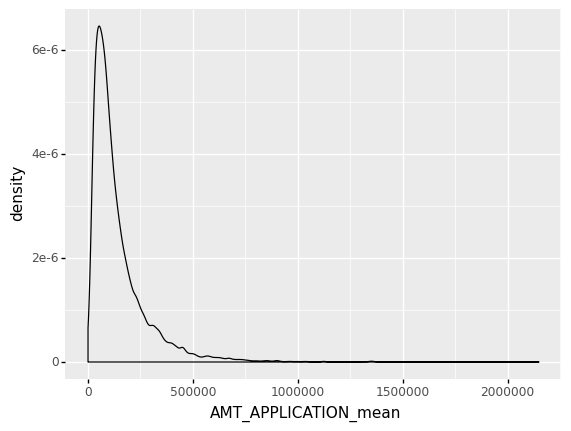

<ggplot: (152439263982)>

In [48]:
ggplot(combo_data1, aes(x = 'AMT_APPLICATION_mean', color = 'CHANNEL_TYPE_Contact center', fill = 'CHANNEL_TYPE_Contact center')) + geom_density(alpha=0.1)


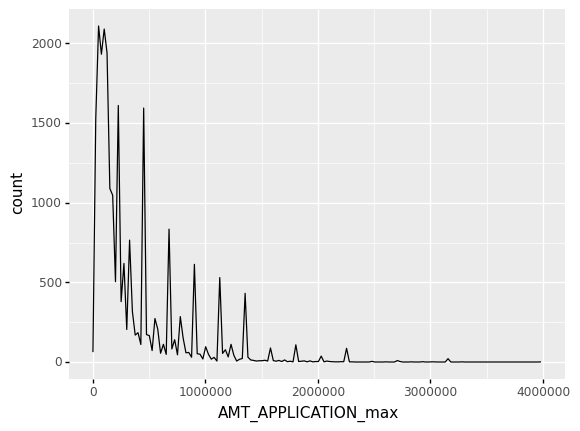

<ggplot: (152558241552)>

In [49]:
ggplot(combo_data1, aes(x = 'AMT_APPLICATION_max')) + geom_freqpoly()


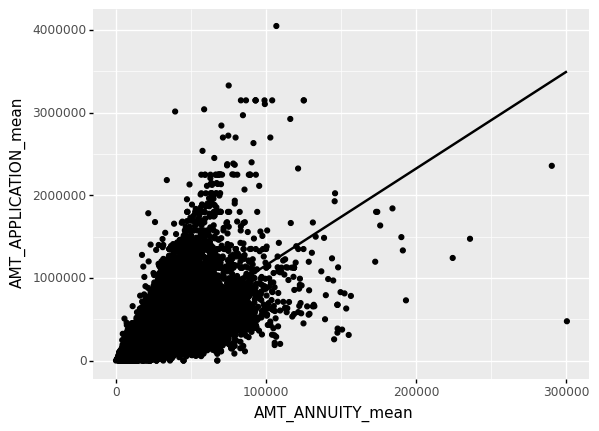

<ggplot: (152439321399)>

In [50]:
# Look at only the agg_data DF
ggplot(agg_data, aes(x= 'AMT_ANNUITY_mean', y = 'AMT_APPLICATION_mean')) + geom_point() + stat_smooth()

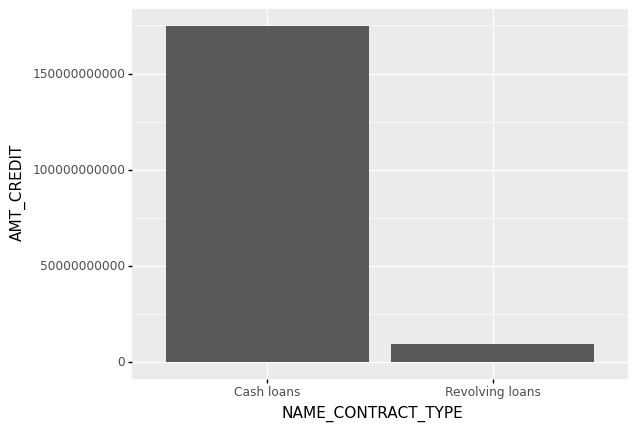

<ggplot: (152558446216)>

In [51]:
#Looking at the Credit Amount by contract for the Application DF
ggplot(application, aes(x = 'NAME_CONTRACT_TYPE', y= 'AMT_CREDIT')) + geom_col()

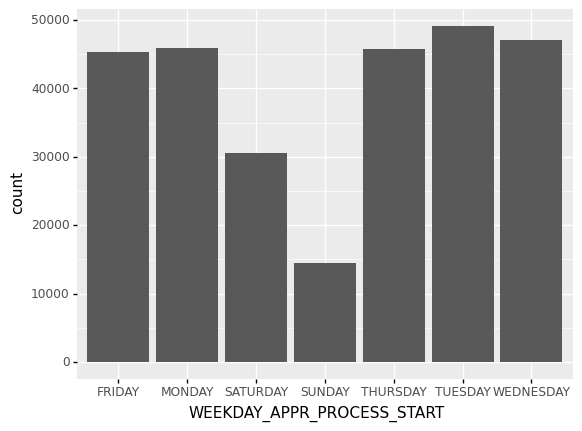

<ggplot: (152398546348)>

In [52]:
# Taking only the cash loans of the application DF for EDA
app_cash = application[application['NAME_CONTRACT_TYPE'] == 'Cash loans']
ggplot(app_cash, aes(x='WEEKDAY_APPR_PROCESS_START')) + geom_bar()

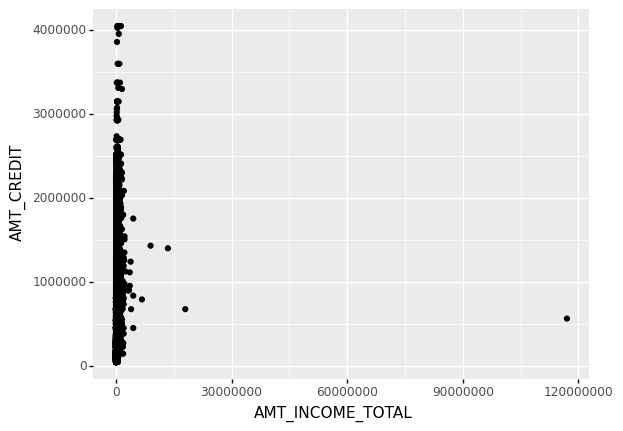

<ggplot: (152563776329)>

In [53]:
ggplot(app_cash, aes(x='AMT_INCOME_TOTAL', y='AMT_CREDIT')) + geom_point()

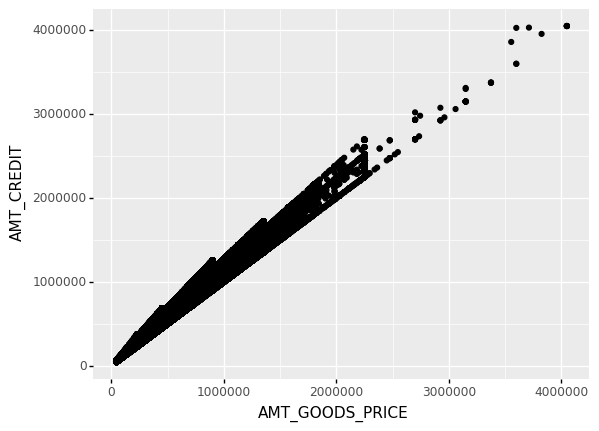

<ggplot: (152439496186)>

In [54]:
ggplot(app_cash, aes(x='AMT_GOODS_PRICE', y='AMT_CREDIT')) + geom_point()

In [55]:
# Filtering the App_cash DF for income under 1000000
app_cash_under1 = app_cash[app_cash['AMT_INCOME_TOTAL'] < 1000000]

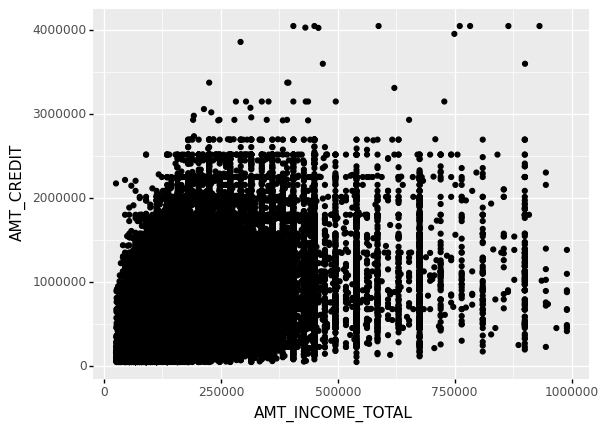

<ggplot: (152628268508)>

In [56]:
ggplot(app_cash_under1, aes(x='AMT_INCOME_TOTAL', y='AMT_CREDIT')) + geom_point()

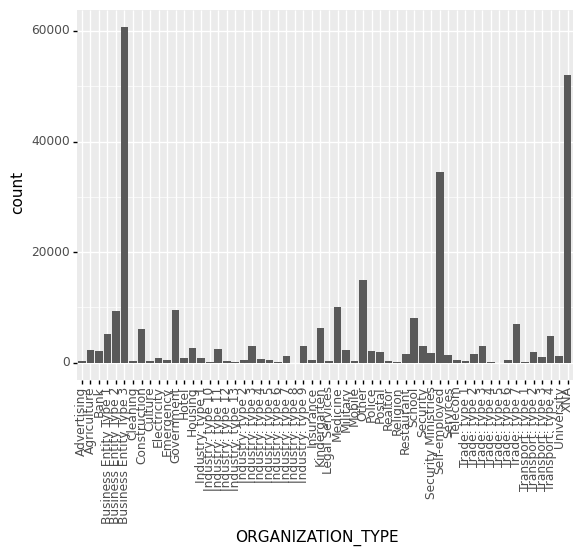

<ggplot: (152439273671)>

In [57]:
ggplot(app_cash, aes(x='ORGANIZATION_TYPE')) + geom_bar() + theme(axis_text_x=element_text(angle=90))

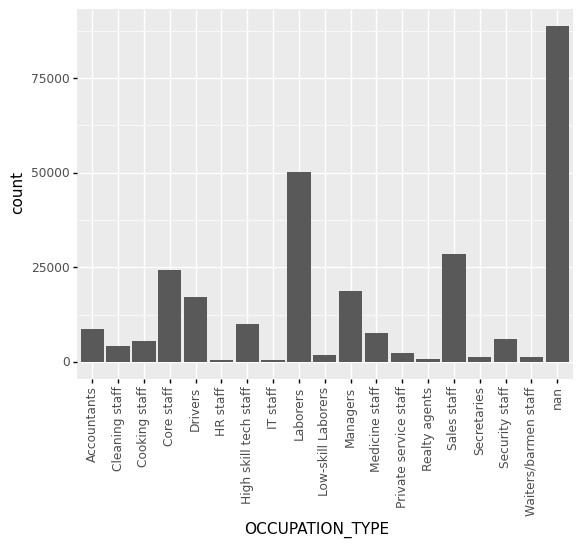

<ggplot: (152564122661)>

In [58]:
ggplot(app_cash, aes(x='OCCUPATION_TYPE', fill = 'TARGET')) + geom_bar() + theme(axis_text_x=element_text(angle=90))

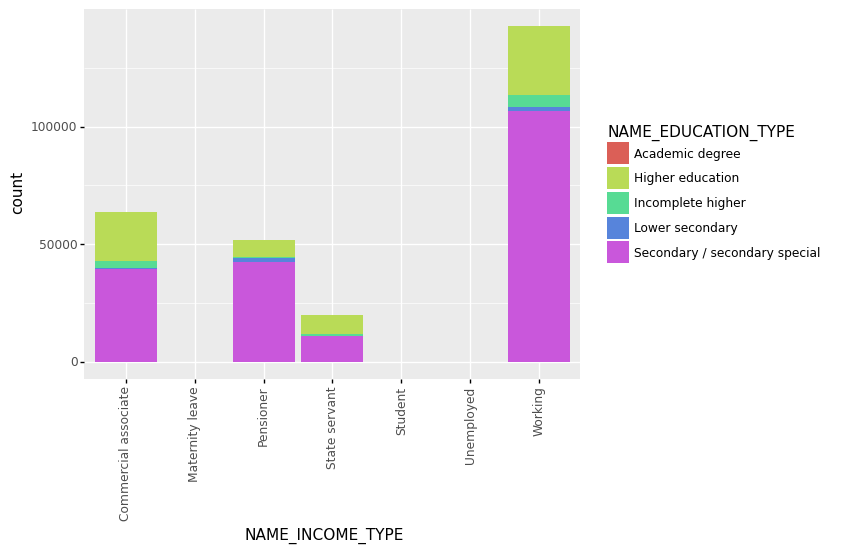

<ggplot: (152663793399)>

In [59]:
ggplot(app_cash, aes(x='NAME_INCOME_TYPE', fill = 'NAME_EDUCATION_TYPE')) + geom_bar() + theme(axis_text_x=element_text(angle=90))

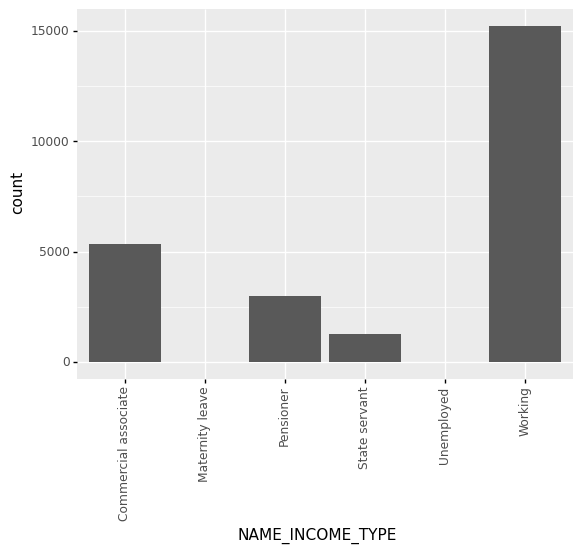

<ggplot: (152563796056)>

In [60]:
# Looking at the Application DF for only defaults
app_default = application[application['TARGET'] == 1]
ggplot(app_default, aes(x='NAME_INCOME_TYPE')) + geom_bar() + theme(axis_text_x=element_text(angle=90))

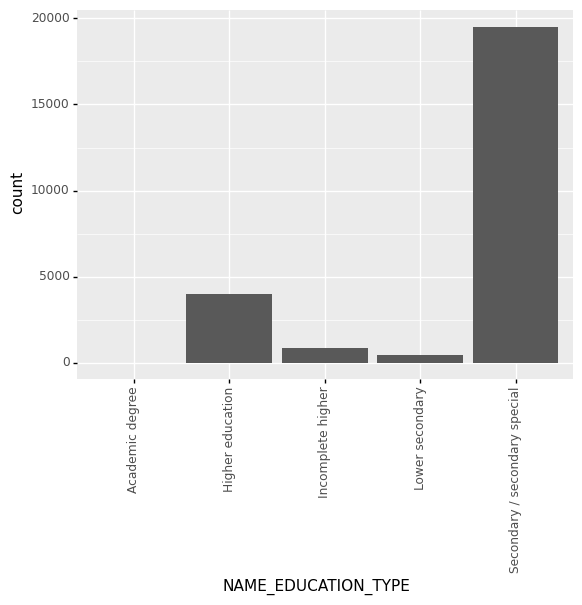

<ggplot: (152564446193)>

In [61]:
ggplot(app_default, aes(x='NAME_EDUCATION_TYPE')) + geom_bar() + theme(axis_text_x=element_text(angle=90))

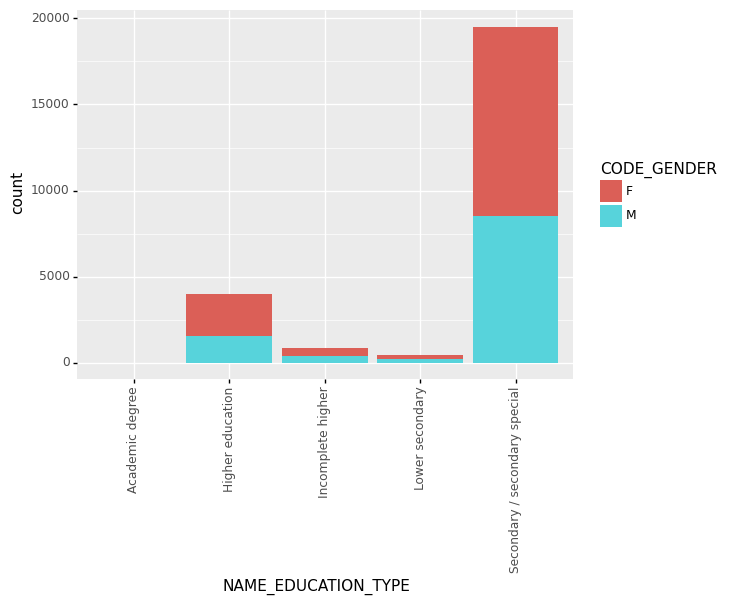

<ggplot: (152563866953)>

In [62]:
ggplot(app_default, aes(x='NAME_EDUCATION_TYPE', fill='CODE_GENDER')) + geom_bar() + theme(axis_text_x=element_text(angle=90))

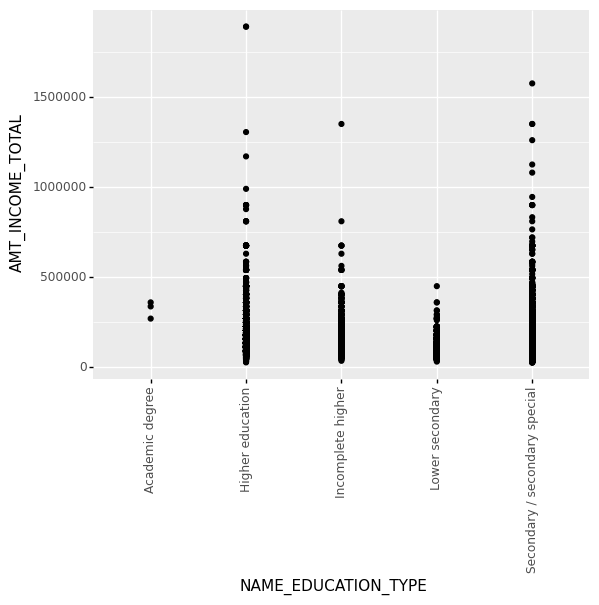

<ggplot: (152563867070)>

In [63]:
# Taking the app_default for income under 2000000
app_default = app_default[app_default['AMT_INCOME_TOTAL'] < 2000000]
ggplot(app_default, aes(x='NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL')) + geom_point() + theme(axis_text_x=element_text(angle=90))

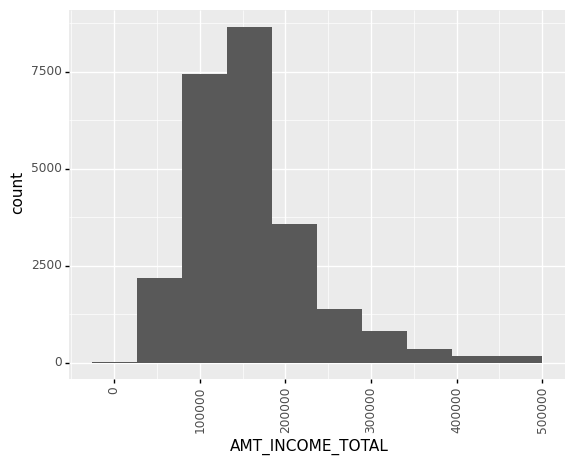

<ggplot: (152563796113)>

In [64]:
# Taking app_default for under 500000
app_default = app_default[app_default['AMT_INCOME_TOTAL'] < 500000]
ggplot(app_default, aes(x='AMT_INCOME_TOTAL')) + geom_histogram(bins=10) + theme(axis_text_x=element_text(angle=90))

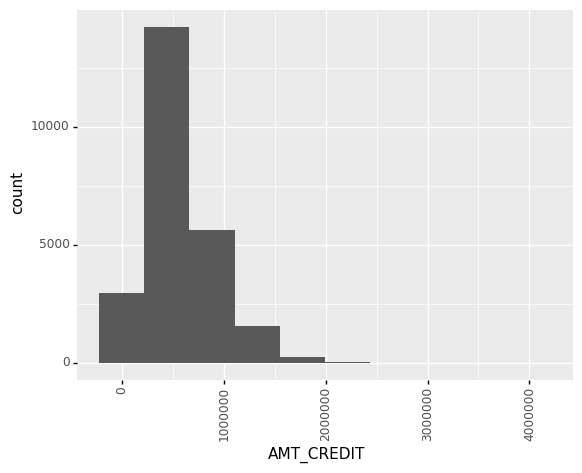

<ggplot: (152565880697)>

In [65]:
ggplot(app_default, aes(x='AMT_CREDIT')) + geom_histogram(bins=10) + theme(axis_text_x=element_text(angle=90))

In [66]:
# Setting the application to briong in Target and setting ID as index
app_target= application[['SK_ID_CURR','TARGET']].set_index(['SK_ID_CURR'])
app_target

,TARGET
SK_ID_CURR,
100002,1
100003,0
100004,0
100006,0
100007,0
...,...
456251,0
456252,0
456253,0


In [67]:
#Map in the Target column to the aggregate df
agg_data['Target'] = agg_data.index.map(application.set_index('SK_ID_CURR')['TARGET'])
agg_data.shape

(338857, 71)

In [68]:
agg_data.head()

,AMT_ANNUITY_sum,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_count,AMT_APPLICATION_sum,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_APPLICATION_count,...,DAYS_LAST_DUE_min,DAYS_LAST_DUE_max,DAYS_LAST_DUE_mean,DAYS_LAST_DUE_count,DAYS_TERMINATION_sum,DAYS_TERMINATION_min,DAYS_TERMINATION_max,DAYS_TERMINATION_mean,DAYS_TERMINATION_count,Target
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3951.000,3951.000,3951.000,3951.000,1,24835.5,24835.5,24835.5,24835.50,1,...,-1619.0,-1619.0,-1619.000000,1,-1612.0,-1612.0,-1612.0,-1612.000000,1,NaN
100002,9251.775,9251.775,9251.775,9251.775,1,179055.0,179055.0,179055.0,179055.00,1,...,-25.0,-25.0,-25.000000,1,-17.0,-17.0,-17.0,-17.000000,1,1.0
100003,169661.970,6737.310,98356.995,56553.990,3,1306309.5,68809.5,900000.0,435436.50,3,...,-1980.0,-536.0,-1054.333333,3,-3142.0,-1976.0,-527.0,-1047.333333,3,0.0
100004,5357.250,5357.250,5357.250,5357.250,1,24282.0,24282.0,24282.0,24282.00,1,...,-724.0,-724.0,-724.000000,1,-714.0,-714.0,-714.0,-714.000000,1,0.0
100005,4813.200,4813.200,4813.200,4813.200,1,44617.5,0.0,44617.5,22308.75,2,...,-466.0,-466.0,-466.000000,1,-460.0,-460.0,-460.0,-460.000000,1,NaN


In [69]:
# Checking Unique values of Target
agg_data['Target'].unique()

array([nan,  1.,  0.])

In [70]:
(agg_data['Target']==0).sum()

267212

In [71]:
(agg_data['Target']==1).sum()

23845

In [72]:
agg_data['Target'].isnull().sum()

47800

In [73]:
#Drop all null Target in the agg_data
agg_data_filtered = agg_data[~agg_data['Target'].isnull()]
agg_data_filtered.shape

(291057, 71)

In [74]:
agg_data_filtered['Target'] = agg_data_filtered['Target'].replace({0:'Good',1:'Default'})

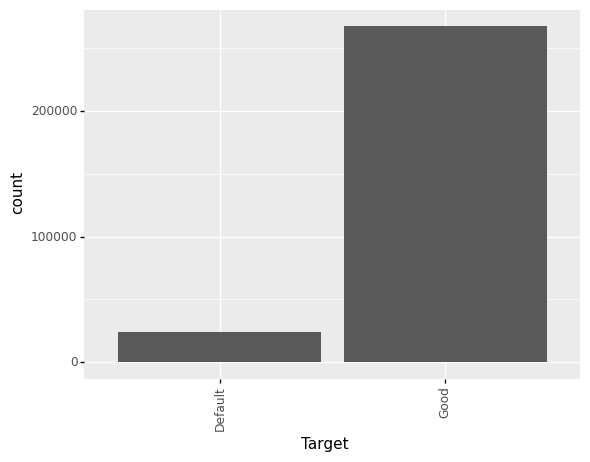

<ggplot: (152558239323)>

In [75]:
# Looking at the agg_data_filtered and comparing the different attributes
ggplot(agg_data_filtered, aes(x='Target')) + geom_bar() + theme(axis_text_x=element_text(angle=90))

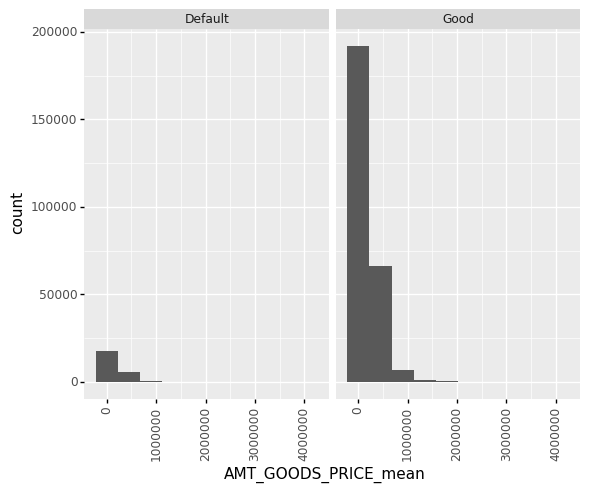

<ggplot: (152638094153)>

In [76]:
ggplot(agg_data_filtered, aes(x='AMT_GOODS_PRICE_mean')) + geom_histogram(bins=10) + theme(axis_text_x=element_text(angle=90)) + facet_wrap('Target')

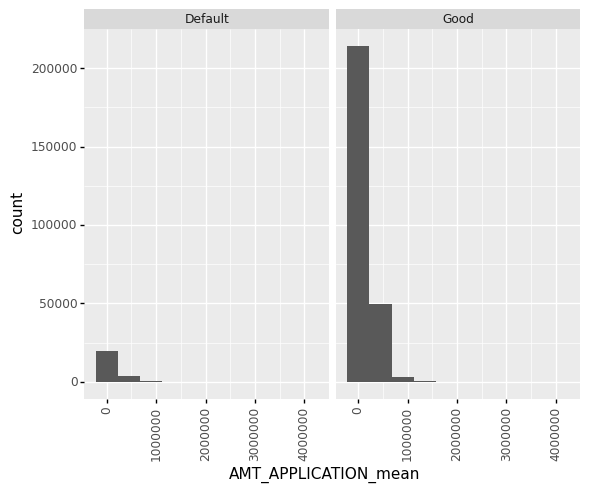

<ggplot: (152439386877)>

In [77]:
ggplot(agg_data_filtered, aes(x='AMT_APPLICATION_mean')) + geom_histogram(bins=10) + theme(axis_text_x=element_text(angle=90)) + facet_wrap('Target')

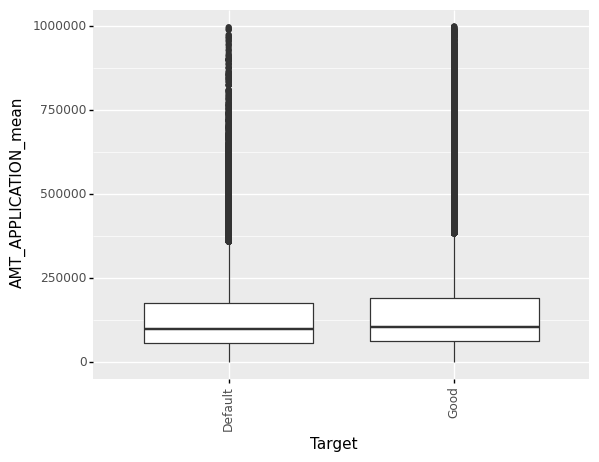

<ggplot: (152564046824)>

In [78]:
ggplot(agg_data_filtered, aes(x='Target', y ='AMT_APPLICATION_mean')) + geom_boxplot() + theme(axis_text_x=element_text(angle=90)) + scale_y_continuous(limits = (0,1000000))

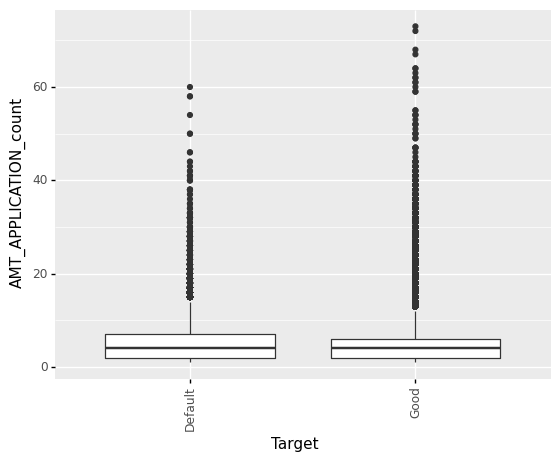

<ggplot: (152564209999)>

In [79]:
ggplot(agg_data_filtered, aes(x='Target', y ='AMT_APPLICATION_count')) + geom_boxplot() + theme(axis_text_x=element_text(angle=90))

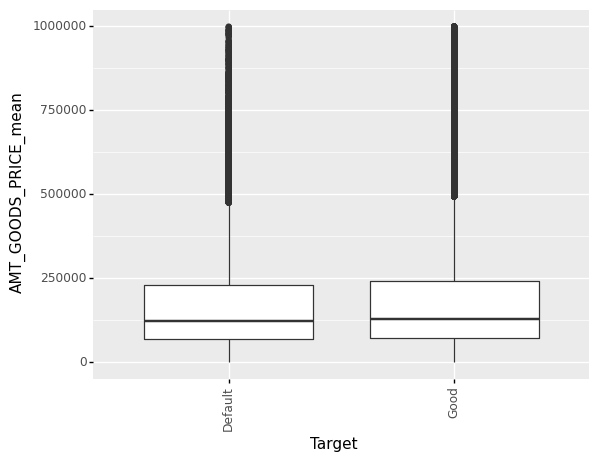

<ggplot: (152680129009)>

In [80]:
ggplot(agg_data_filtered, aes(x='Target', y ='AMT_GOODS_PRICE_mean')) + geom_boxplot() + theme(axis_text_x=element_text(angle=90)) + scale_y_continuous(limits = (0,1000000))

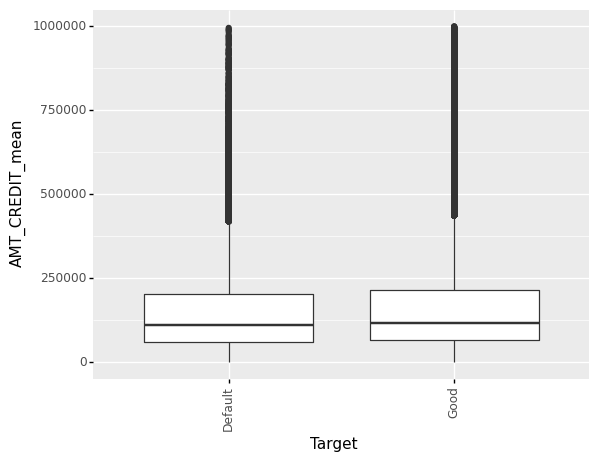

<ggplot: (152564174583)>

In [81]:
ggplot(agg_data_filtered, aes(x='Target', y ='AMT_CREDIT_mean')) + geom_boxplot() + theme(axis_text_x=element_text(angle=90)) + scale_y_continuous(limits = (0,1000000))

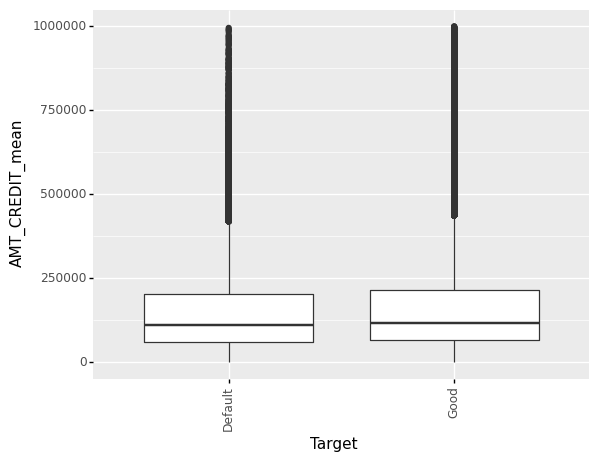

<ggplot: (152688088052)>

In [82]:
ggplot(agg_data_filtered, aes(x='Target', y ='AMT_CREDIT_mean')) + geom_boxplot() + theme(axis_text_x=element_text(angle=90)) + scale_y_continuous(limits = (0,1000000))

In [83]:
import scipy.stats as stats

# Stats for a few chosen attributes that seemed to have importance
stats.f_oneway(app_cash_under1['AMT_INCOME_TOTAL'][app_cash_under1['TARGET'] == 1],
               app_cash_under1['AMT_INCOME_TOTAL'][app_cash_under1['TARGET'] == 0])


F_onewayResult(statistic=118.35334817188541, pvalue=1.4696432441634135e-27)

In [84]:
stats.f_oneway(app_cash_under1['AMT_GOODS_PRICE'][app_cash_under1['TARGET'] == 1],
               app_cash_under1['AMT_GOODS_PRICE'][app_cash_under1['TARGET'] == 0])

F_onewayResult(statistic=564.1015755074123, pvalue=1.4352291499728146e-124)

In [85]:
stats.f_oneway(app_cash_under1['AMT_CREDIT'][app_cash_under1['TARGET'] == 1],
               app_cash_under1['AMT_CREDIT'][app_cash_under1['TARGET'] == 0])

F_onewayResult(statistic=374.36802675091957, pvalue=2.3775153280632562e-83)

In [86]:
contingency_edu = pd.crosstab(app_cash_under1['TARGET'],app_cash_under1['NAME_EDUCATION_TYPE'])
contingency_edu

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
TARGET,,,,,
0,143,61523,8227,3209,181743
1,3,3689,801,397,18318


In [87]:
stat, p, dof, expected = stats.chi2_contingency(contingency_edu)
print('stat =',stat,'\n', 'p = ', p)

stat = 832.3459106933074 
 p =  7.563070027948533e-179


In [88]:
contingency_occ = pd.crosstab(app_cash_under1['TARGET'],app_cash_under1['OCCUPATION_TYPE'])
stat, p, dof, expected = stats.chi2_contingency(contingency_occ)
print('stat =',stat,'\n', 'p = ', p)

stat = 1244.6619449881855 
 p =  3.453952497505633e-254


In [89]:
contingency_org = pd.crosstab(app_cash_under1['TARGET'],app_cash_under1['ORGANIZATION_TYPE'])
stat, p, dof, expected = stats.chi2_contingency(contingency_org)
print('stat =',stat,'\n', 'p = ', p)

stat = 1574.1782772332049 
 p =  1.1721671670929175e-291


In [90]:
# merging the application data with the previous agg data
all_apps= application.merge(agg_data, on='SK_ID_CURR', how='left')

In [91]:
all_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_DUE_min,DAYS_LAST_DUE_max,DAYS_LAST_DUE_mean,DAYS_LAST_DUE_count,DAYS_TERMINATION_sum,DAYS_TERMINATION_min,DAYS_TERMINATION_max,DAYS_TERMINATION_mean,DAYS_TERMINATION_count,Target
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-25.0,-25.0,-25.000000,1.0,-17.0,-17.0,-17.0,-17.000000,1.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1980.0,-536.0,-1054.333333,3.0,-3142.0,-1976.0,-527.0,-1047.333333,3.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-724.0,-724.0,-724.000000,1.0,-714.0,-714.0,-714.0,-714.000000,1.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-425.0,365243.0,182477.500000,4.0,729927.0,-416.0,365243.0,182481.750000,4.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-2056.0,365243.0,72136.200000,5.0,360719.0,-2041.0,365243.0,72143.800000,5.0,0.0


In [92]:
all_apps.select_dtypes('object').columns



Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [93]:
# Adding Dummies to application
all_apps_w_dumm = pd.get_dummies(all_apps).groupby('SK_ID_CURR').sum()

In [94]:
all_apps_w_dumm.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Builing Models
from sklearn.model_selection import train_test_split
X = all_apps_w_dumm.drop(['TARGET', 'Target'], axis=1)
Y = all_apps_w_dumm.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=46)

In [96]:
from sklearn import preprocessing, linear_model

scaler = preprocessing.StandardScaler()
scaled_fit = scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

rf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_rf = rf.fit(X_train_scaled, y_train)
y_pred = model_rf.predict_proba(X_test_scaled)

#ac= accuracy_score(y_test,y_pred)
#f1 = f1_score(y_test,y_pred)
auc= roc_auc_score(y_test,y_pred[:,1])
#conf= confusion_matrix(y_test,y_pred)

#print('Random Forest: Accuracy=%.3f' % (ac))
#print('Random Forest: f1-score=%.3f' % (f1))
print('Random Forest: AUC-score=%.3f' % (auc))
#print(conf)



Random Forest: AUC-score=0.723


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  0.1
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  0.25
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  0.5
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  0.75
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  1
Accuracy score (training): 0.919
Accuracy score (validation): 0.919



In [99]:
learning_rates = [0.0000005, 0.000001, 0.0000025, 0.000005, 0.0000075, 0.00001]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  5e-07
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  1e-06
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  2.5e-06
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  5e-06
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  7.5e-06
Accuracy score (training): 0.919
Accuracy score (validation): 0.919

Learning rate:  1e-05
Accuracy score (training): 0.919
Accuracy score (validation): 0.919



In [100]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train,y_train)
predictions = gb.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test,predictions))
#print(y_test)
#fpr_gb, tpr_gb = roc_curve(y_test, predictions)
#roc_auc_gb = auc(fpr_gb, tpr_gb)

#print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))



0.6132225158679528


In [101]:
regModel = linear_model.LinearRegression(normalize=True)
regModel.fit(X_train, y_train)

y_pred= regModel.predict(X_test)
print(regModel.score(X_train, y_train))
#plt.scatter(y_test, y_pred)

0.0630185225269434


In [102]:
from sklearn.model_selection import GridSearchCV

Params = {'max_depth':[2,10],
          'n_estimators':[100,500]}
rf_search= RandomForestClassifier()
clf = GridSearchCV(estimator=rf_search,param_grid=Params, scoring='roc_auc',  n_jobs=4 )
clf.fit(X_train_scaled, y_train)

print(clf.best_params_)

{'max_depth': 10, 'n_estimators': 500}


In [103]:
rf = RandomForestClassifier(n_estimators=500, max_depth = 10, random_state = 1,n_jobs=4)
model_rf = rf.fit(X_train_scaled, y_train)
y_pred = model_rf.predict_proba(X_test_scaled)

auc= roc_auc_score(y_test,y_pred[:,1])

print('Random Forest: AUC-score=%.3f' % (auc))

Random Forest: AUC-score=0.742


In [114]:
clf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])